In [2]:
import pandas as pd
import numpy as np
import requests
import geopandas as gpd
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import lxml
import html5lib

import re

from shapely.geometry import Point

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm, trange

print('Libraries imported.')

C:\Users\admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Libraries imported.


In [3]:
sns.set()

In [4]:
def get_coord(address):

    geolocator = Nominatim(user_agent="to_explorer")
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print(f'The geograpical coordinate of {address} are {latitude:.2f}, {longitude:.2f}.')
        return latitude, longitude
    except:
        return None, None

# Import Data

In [5]:
gdf_ny = gpd.read_file('../data/nyu-2451-34572-shapefile/nyu_2451_34572.shp')

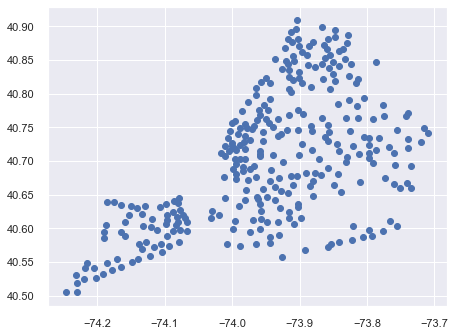

In [6]:
gdf_ny.plot()

In [7]:
gdf_ny.head()

,name,stacked,annoline1,annoline2,annoline3,annoangle,borough,geometry
0,Wakefield,1,Wakefield,None,None,0.0,Bronx,POINT (-73.84720 40.89471)
1,Co-op City,2,Co-op,City,None,0.0,Bronx,POINT (-73.82994 40.87429)
2,Eastchester,1,Eastchester,None,None,0.0,Bronx,POINT (-73.82781 40.88756)
3,Fieldston,1,Fieldston,None,None,0.0,Bronx,POINT (-73.90564 40.89544)
4,Riverdale,1,Riverdale,None,None,0.0,Bronx,POINT (-73.91259 40.89083)


In [85]:
print(gdf_ny.head().to_markdown())

|    | name        |   stacked | annoline1   | annoline2   | annoline3   |   annoangle | borough   | geometry                                     |   Longitude |   Latitude |
|---:|:------------|----------:|:------------|:------------|:------------|------------:|:----------|:---------------------------------------------|------------:|-----------:|
|  0 | Wakefield   |         1 | Wakefield   |             |             |           0 | Bronx     | POINT (-73.84720052054902 40.89470517661)    |    -73.8472 |    40.8947 |
|  1 | Co-op City  |         2 | Co-op       | City        |             |           0 | Bronx     | POINT (-73.82993910812398 40.87429419303012) |    -73.8299 |    40.8743 |
|  2 | Eastchester |         1 | Eastchester |             |             |           0 | Bronx     | POINT (-73.82780644716412 40.88755567735078) |    -73.8278 |    40.8876 |
|  3 | Fieldston   |         1 | Fieldston   |             |             |           0 | Bronx     | POINT (-73.9056425959168

In [8]:
gdf_ny['Longitude'] = gdf_ny.geometry.apply(lambda x: x.x)
gdf_ny['Latitude'] = gdf_ny.geometry.apply(lambda x: x.y)

In [9]:
df_market = pd.read_csv('../data/DOHMH_Farmers_Markets.csv')

In [10]:
df_market.head()

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [11]:
df_nyc_boro_summary = pd.read_html('https://en.wikipedia.org/wiki/New_York_City', header=1)[2].iloc[1:6]

In [12]:
df_nyc_boro_summary

,Jurisdiction,Jurisdiction.1,Population,Gross Domestic Product,Gross Domestic Product.1,Land area,Land area.1,Density,Density.1
1,The Bronx,Bronx,1418207,42.695,30100,42.10,109.04,33867,13006
2,Brooklyn,Kings,2559903,91.559,35800,70.82,183.42,36147,13957
3,Manhattan,New York,1628706,600.244,368500,22.83,59.13,71341,27544
4,Queens,Queens,2253858,93.310,41400,108.53,281.09,20767,8018
5,Staten Island,Richmond,476143,14.514,30500,58.37,151.18,8157,3150


In [13]:
df_nyc_boro_summary.columns = [
    'Borough', 'County', 'Population', 'GDP', 'GDP_per_capita', 'Land_area_sq_miles', 
    'Land_area_sq_km', 'Population_density_per_sq_miles', 'Population_density_per_sq_km']

In [14]:
df_nyc_boro_summary.head()

,Borough,County,Population,GDP,GDP_per_capita,Land_area_sq_miles,Land_area_sq_km,Population_density_per_sq_miles,Population_density_per_sq_km
1,The Bronx,Bronx,1418207,42.695,30100,42.10,109.04,33867,13006
2,Brooklyn,Kings,2559903,91.559,35800,70.82,183.42,36147,13957
3,Manhattan,New York,1628706,600.244,368500,22.83,59.13,71341,27544
4,Queens,Queens,2253858,93.310,41400,108.53,281.09,20767,8018
5,Staten Island,Richmond,476143,14.514,30500,58.37,151.18,8157,3150


# Exploratiory Analysis

## New York Neighborhoods

In [15]:
lat_lon_new_york = get_coord('New York City, USA')

The geograpical coordinate of New York City, USA are 40.71, -74.01.


In [16]:
lat_lon_new_york

(40.7127281, -74.0060152)

In [17]:
mapa = folium.Map(lat_lon_new_york,
                  zoom_start=11,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(gdf_ny.to_json())

mapa.add_children(points)
mapa

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys


# FourSqare

In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        headers = {'Accept': 'application/json'}
            
        # make the GET request
        results = requests.get(url, headers=headers).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
CLIENT_ID, CLIENT_SECRET = open('../data/foursquare_config', 'r+').readline().split(',')
VERSION = '20180605' # Foursquare API version

In [66]:
df_venues = getNearbyVenues(names=gdf_ny['name'],
                            latitudes=gdf_ny['Latitude'],
                            longitudes=gdf_ny['Longitude']
                           )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [67]:
df_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [68]:
df_venues.shape

(9905, 7)

In [69]:
df_venues.groupby('Neighborhood').size()

Neighborhood
Allerton          31
Annadale          12
Arden Heights      4
Arlington          7
Arrochar          20
                ... 
Woodhaven         24
Woodlawn          26
Woodrow           20
Woodside          70
Yorkville        100
Length: 301, dtype: int64

In [70]:
len(df_venues['Venue Category'].unique())

429

In [71]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reindex(gdf_ny.name).fillna(0).reset_index()
df_grouped

,name,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Wakefield,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,Co-op City,0.0,0.055556,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Eastchester,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Fieldston,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0
4,Riverdale,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Hudson Yards,0.0,0.000000,0.0,0.0,0.0,0.0,0.036364,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018182,0.0,0.0
302,Hammels,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
303,Bayswater,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
304,Queensbridge,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [73]:
restaurant_related_categories = [
    c for c in df_grouped.columns 
    if (
        ('Restaurant ' in c) or ('BBQ ' in c) or ('Bagel' in c) or ('Bakery' in c) or ('Bar ' in c) or ('Buffet' in c) or ('Bistro' in c) or ('Burrito' in c) or
        ('Burger ' in c) or ('Bubble Tea ' in c) or ('Café' in c) or ('Cafeteria' in c) or ('Breakfast' in c) or ('Candy' in c) or ('Chocolate' in c) or ('Coffee' in c) or
        ('Donut ' in c) or ('Beer ' in c) or ('Cheese' in c) or ('Cupcake' in c) or ('Fish ' in c) or ('Food ' in c) or ('Dessert' in c) or ('Diner' in c) or ('Farmer' in c) or
        ('Hot Dog ' in c) or ('Ice Cream ' in c) or ('Irish Pub' in c) or ('Chicken' in c) or ('Yogurt' in c) or ('Fruit' in c) or ('Pie ' in c) or ('Pizza' in c) or ('Poke' in c) or
        ('Vegan ' in c) or ('Smoothie' in c) or ('Steak' in c) or ('Wings' in c) or ('Taco ' in c)
    ) and (('Market' not in c))
]

In [74]:
len(restaurant_related_categories)

48

In [75]:
# one hot encoding
temp = df_venues[df_venues['Venue Category'].isin(restaurant_related_categories)]
df_onehot = pd.get_dummies(temp[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = temp['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Neighborhood,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Breakfast Spot,...,Mac & Cheese Joint,Pet Café,Pie Shop,Pizza Place,Poke Place,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Co-op City,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13,Co-op City,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_venues[df_venues['Venue Category'].isin(restaurant_related_categories)].shape

(2437, 7)

In [83]:
print(df_venues[df_venues['Venue Category'].isin(restaurant_related_categories)]['Venue Category'].value_counts().head(10).to_markdown())

|                      |   Venue Category |
|:---------------------|-----------------:|
| Pizza Place          |              436 |
| Coffee Shop          |              304 |
| Bakery               |              226 |
| Café                 |              172 |
| Donut Shop           |              165 |
| Ice Cream Shop       |              137 |
| Bagel Shop           |              108 |
| Fast Food Restaurant |               94 |
| Diner                |               90 |
| Burger Joint         |               80 |


In [35]:
df_onehot.groupby('Neighborhood').sum().sum(1)

Neighborhood
Allerton         11
Annadale          5
Arden Heights     2
Arlington         1
Arrochar          4
                 ..
Woodhaven         4
Woodlawn          6
Woodrow           6
Woodside         19
Yorkville        25
Length: 267, dtype: int64

In [36]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reindex(gdf_ny.name).fillna(0).reset_index()
# df_grouped['total_restaurant_count'] = df_onehot.groupby('Neighborhood').sum().sum(1).reindex(gdf_ny.name).fillna(0).reset_index(drop=True)

In [37]:
df_grouped.head()

,name,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Breakfast Spot,...,Mac & Cheese Joint,Pet Café,Pie Shop,Pizza Place,Poke Place,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,Wakefield,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Co-op City,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0
2,Eastchester,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0
3,Fieldston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Riverdale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_grouped.describe().loc['max'].sort_values()

Mac & Cheese Joint                 0.037037
Food Stand                         0.052632
Hot Dog Joint                      0.052632
Chocolate Shop                     0.058824
Cheese Shop                        0.080000
College Cafeteria                  0.083333
Poke Place                         0.083333
Pie Shop                           0.090909
Pet Café                           0.100000
Burrito Place                      0.111111
Buffet                             0.125000
Beer Store                         0.125000
Fish & Chips Shop                  0.142857
Taco Place                         0.142857
Beer Bar                           0.142857
Frozen Yogurt Shop                 0.166667
Cafeteria                          0.200000
Health Food Store                  0.200000
Steakhouse                         0.200000
Fruit & Vegetable Store            0.250000
Bed & Breakfast                    0.250000
Wings Joint                        0.250000
BBQ Joint                       

# Clustering

In [39]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped.drop('name', 1))

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 2, 0, 2, 1, 3])

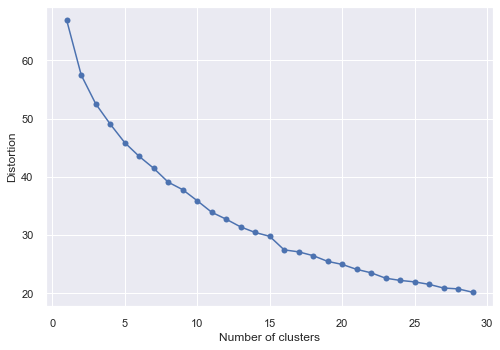

In [40]:
distortions = []
for i in range(1, 30):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=20, max_iter=200,
        tol=1e-1, random_state=0,
        algorithm='full'
    )
    km.fit(df_grouped.drop('name', 1))
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

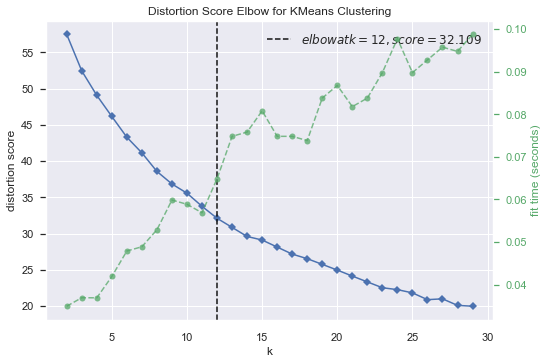

In [41]:
# Instantiate the clustering model and visualizer
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,30))

visualizer.fit(df_grouped.drop('name', 1))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [43]:
# set number of clusters
kclusters = 12

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped.drop('name', 1))

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 1,  0,  1,  4, 11,  1,  2,  7,  7,  4])

In [44]:
gdf_ny.head()

,name,stacked,annoline1,annoline2,annoline3,annoangle,borough,geometry,Longitude,Latitude
0,Wakefield,1,Wakefield,None,None,0.0,Bronx,POINT (-73.84720 40.89471),-73.847201,40.894705
1,Co-op City,2,Co-op,City,None,0.0,Bronx,POINT (-73.82994 40.87429),-73.829939,40.874294
2,Eastchester,1,Eastchester,None,None,0.0,Bronx,POINT (-73.82781 40.88756),-73.827806,40.887556
3,Fieldston,1,Fieldston,None,None,0.0,Bronx,POINT (-73.90564 40.89544),-73.905643,40.895437
4,Riverdale,1,Riverdale,None,None,0.0,Bronx,POINT (-73.91259 40.89083),-73.912585,40.890834


In [45]:
# add clustering labels
df_clustering_results = df_grouped.copy()
df_clustering_results.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = gdf_ny.join(df_clustering_results.set_index('name'), on='name')

df_merged.head() # check the last columns!

,name,stacked,annoline1,annoline2,annoline3,annoangle,borough,geometry,Longitude,Latitude,...,Mac & Cheese Joint,Pet Café,Pie Shop,Pizza Place,Poke Place,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,Wakefield,1,Wakefield,None,None,0.0,Bronx,POINT (-73.84720 40.89471),-73.847201,40.894705,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Co-op City,2,Co-op,City,None,0.0,Bronx,POINT (-73.82994 40.87429),-73.829939,40.874294,...,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0
2,Eastchester,1,Eastchester,None,None,0.0,Bronx,POINT (-73.82781 40.88756),-73.827806,40.887556,...,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0
3,Fieldston,1,Fieldston,None,None,0.0,Bronx,POINT (-73.90564 40.89544),-73.905643,40.895437,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Riverdale,1,Riverdale,None,None,0.0,Bronx,POINT (-73.91259 40.89083),-73.912585,40.890834,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# create map
map_clusters = folium.Map(
    location=lat_lon_new_york, 
    zoom_start=11,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['name'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [49]:
df_merged.columns

Index(['name', 'stacked', 'annoline1', 'annoline2', 'annoline3', 'annoangle',
       'borough', 'geometry', 'Longitude', 'Latitude', 'Cluster Labels',
       'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bed & Breakfast', 'Beer Bar',
       'Beer Garden', 'Beer Store', 'Bistro', 'Breakfast Spot',
       'Bubble Tea Shop', 'Buffet', 'Burger Joint', 'Burrito Place',
       'Cafeteria', 'Café', 'Candy Store', 'Cheese Shop', 'Chocolate Shop',
       'Coffee Shop', 'College Cafeteria', 'Comfort Food Restaurant',
       'Cupcake Shop', 'Dessert Shop', 'Diner', 'Donut Shop',
       'Fast Food Restaurant', 'Fish & Chips Shop', 'Food & Drink Shop',
       'Food Court', 'Food Stand', 'Food Truck', 'Fried Chicken Joint',
       'Frozen Yogurt Shop', 'Fruit & Vegetable Store', 'Health Food Store',
       'Hot Dog Joint', 'Ice Cream Shop', 'Irish Pub', 'Mac & Cheese Joint',
       'Pet Café', 'Pie Shop', 'Pizza Place', 'Poke Place',
       'Southern / Soul Food Restaurant', 'Steakhouse', 'Taco Place',
    

In [50]:
df_merged.groupby('Cluster Labels').agg({c: 'mean' for c in restaurant_related_categories})

,BBQ Joint,Bagel Shop,Bakery,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Breakfast Spot,Bubble Tea Shop,...,Mac & Cheese Joint,Pet Café,Pie Shop,Pizza Place,Poke Place,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,0.011688,0.027045,0.004545,0.000000,0.000000,0.000000,0.000000,0.000000,0.021806,0.016667,...,0.000000,0.000000,0.000000,0.040198,0.000000,0.010556,0.000000,0.000000,0.000000,0.007143
1,0.002404,0.038202,0.077720,0.000000,0.000836,0.001202,0.000000,0.002484,0.005163,0.004882,...,0.000000,0.000000,0.000000,0.153342,0.000000,0.001282,0.019402,0.006646,0.000836,0.002118
2,0.016004,0.032522,0.073194,0.004098,0.006078,0.006268,0.003084,0.002851,0.020428,0.008831,...,0.000607,0.000607,0.001805,0.149947,0.004333,0.002990,0.031249,0.017329,0.018977,0.005431
3,0.020881,0.114602,0.094739,0.000000,0.005597,0.005043,0.004955,0.003691,0.005784,0.015843,...,0.000000,0.004412,0.002674,0.154972,0.001050,0.003035,0.003460,0.004552,0.021432,0.000000
4,0.005076,0.016474,0.002268,0.000000,0.002041,0.020408,0.000000,0.020408,0.013546,0.011091,...,0.000000,0.000000,0.000000,0.005076,0.001074,0.023583,0.000887,0.003155,0.001074,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.975000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.007800,0.017036,0.322209,0.000000,0.002874,0.000000,0.000000,0.000000,0.010216,0.023365,...,0.000000,0.000000,0.000000,0.206171,0.000000,0.000000,0.014857,0.016357,0.025496,0.004944
7,0.000000,0.076960,0.023938,0.000000,0.003106,0.000000,0.000000,0.000000,0.030305,0.010870,...,0.000000,0.000000,0.001359,0.435297,0.001449,0.007246,0.000000,0.001672,0.008605,0.006884
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
df_merged['Cluster Labels'].value_counts()

2     61
1     52
4     49
7     46
3     34
6     29
0     20
5     10
8      6
9      3
11     2
10     2
Name: Cluster Labels, dtype: int64

In [52]:
for i in range(kclusters):
    print(i, sum(df_merged['Cluster Labels'] == i))
    display(df_merged[df_merged['Cluster Labels'] == i][restaurant_related_categories].mean().sort_values(ascending=False).head(10))

    # create map
    map_clusters = folium.Map(
        location=lat_lon_new_york, 
        zoom_start=11,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False)

    # add markers to the map
    markers_colors = []
    for lat, lon, poi in zip(
        df_merged[df_merged['Cluster Labels'] == i]['Latitude'], 
        df_merged[df_merged['Cluster Labels'] == i]['Longitude'], 
        df_merged[df_merged['Cluster Labels'] == i]['name']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(i), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7).add_to(map_clusters)
        
    display(map_clusters)

0 20


Fast Food Restaurant    0.422783
Donut Shop              0.093119
Fried Chicken Joint     0.084722
Diner                   0.056768
Coffee Shop             0.052222
Pizza Place             0.040198
Food & Drink Shop       0.036688
Food Truck              0.030556
Bagel Shop              0.027045
Irish Pub               0.025000
dtype: float64

1 52


Donut Shop              0.245313
Pizza Place             0.153342
Ice Cream Shop          0.083402
Bakery                  0.077720
Diner                   0.074705
Fast Food Restaurant    0.058105
Fried Chicken Joint     0.051918
Coffee Shop             0.046054
Bagel Shop              0.038202
Dessert Shop            0.026732
dtype: float64

2 61


Coffee Shop       0.257459
Pizza Place       0.149947
Café              0.074816
Bakery            0.073194
Burger Joint      0.039737
Ice Cream Shop    0.038879
Donut Shop        0.034869
Bagel Shop        0.032522
Steakhouse        0.031249
Food Truck        0.027725
dtype: float64

3 34


Café                             0.192507
Pizza Place                      0.154972
Bagel Shop                       0.114602
Bakery                           0.094739
Ice Cream Shop                   0.091788
Coffee Shop                      0.057239
Diner                            0.043335
Dessert Shop                     0.038918
Vegetarian / Vegan Restaurant    0.021432
Burger Joint                     0.021284
dtype: float64

4 49


Burger Joint                       0.040964
Fried Chicken Joint                0.040283
Southern / Soul Food Restaurant    0.023583
Beer Garden                        0.020408
Bistro                             0.020408
Bagel Shop                         0.016474
Food Court                         0.013605
Breakfast Spot                     0.013546
Bubble Tea Shop                    0.011091
Candy Store                        0.010204
dtype: float64

5 10


Pizza Place                0.975
Fried Chicken Joint        0.025
Wings Joint                0.000
Burger Joint               0.000
Comfort Food Restaurant    0.000
College Cafeteria          0.000
Coffee Shop                0.000
Chocolate Shop             0.000
Cheese Shop                0.000
Candy Store                0.000
dtype: float64

6 29


Bakery                           0.322209
Pizza Place                      0.206171
Donut Shop                       0.064332
Fried Chicken Joint              0.053496
Coffee Shop                      0.044797
Diner                            0.043294
Fast Food Restaurant             0.029634
Vegetarian / Vegan Restaurant    0.025496
Bubble Tea Shop                  0.023365
Dessert Shop                     0.019015
dtype: float64

7 46


Pizza Place             0.435297
Bagel Shop              0.076960
Donut Shop              0.064809
Ice Cream Shop          0.064020
Fried Chicken Joint     0.044368
Diner                   0.041848
Food Truck              0.038432
Coffee Shop             0.032013
Breakfast Spot          0.030305
Fast Food Restaurant    0.027691
dtype: float64

8 6


Donut Shop                 0.916667
Café                       0.083333
Dessert Shop               0.000000
Cupcake Shop               0.000000
Comfort Food Restaurant    0.000000
College Cafeteria          0.000000
Coffee Shop                0.000000
Chocolate Shop             0.000000
Cheese Shop                0.000000
Candy Store                0.000000
dtype: float64

9 3


Coffee Shop                      1.0
Wings Joint                      0.0
Vegetarian / Vegan Restaurant    0.0
Cupcake Shop                     0.0
Comfort Food Restaurant          0.0
College Cafeteria                0.0
Chocolate Shop                   0.0
Cheese Shop                      0.0
Candy Store                      0.0
Café                             0.0
dtype: float64

10 2


Café                             1.0
Wings Joint                      0.0
Vegetarian / Vegan Restaurant    0.0
Cupcake Shop                     0.0
Comfort Food Restaurant          0.0
College Cafeteria                0.0
Coffee Shop                      0.0
Chocolate Shop                   0.0
Cheese Shop                      0.0
Candy Store                      0.0
dtype: float64

11 2


Food Truck                 1.0
Wings Joint                0.0
Dessert Shop               0.0
Comfort Food Restaurant    0.0
College Cafeteria          0.0
Coffee Shop                0.0
Chocolate Shop             0.0
Cheese Shop                0.0
Candy Store                0.0
Café                       0.0
dtype: float64

In [62]:
i = [0, 2, 3, 4]
print(i, sum(df_merged['Cluster Labels'].isin(i)))
display(df_merged[df_merged['Cluster Labels'].isin(i)][restaurant_related_categories].mean().sort_values(ascending=False).head(10))

# create map
map_clusters = folium.Map(
    location=lat_lon_new_york, 
    zoom_start=11,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(
    df_merged[df_merged['Cluster Labels'].isin(i)]['Latitude'], 
    df_merged[df_merged['Cluster Labels'].isin(i)]['Longitude'], 
    df_merged[df_merged['Cluster Labels'].isin(i)]['name']):
    label = folium.Popup(str(poi) + ' Cluster ' + ' '.join(str(i)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

[0, 2, 3, 4] 164


Coffee Shop             0.116148
Pizza Place             0.094320
Café                    0.070775
Fast Food Restaurant    0.058498
Bakery                  0.048098
Bagel Shop              0.044076
Ice Cream Shop          0.037667
Burger Joint            0.031432
Donut Shop              0.030049
Fried Chicken Joint     0.028711
dtype: float64

In [61]:
i = [1, 5, 6, 7, 8]
print(i, sum(df_merged['Cluster Labels'].isin(i)))
display(df_merged[df_merged['Cluster Labels'].isin(i)][restaurant_related_categories].mean().sort_values(ascending=False).head(10))

# create map
map_clusters = folium.Map(
    location=lat_lon_new_york, 
    zoom_start=11,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=False)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(
    df_merged[df_merged['Cluster Labels'].isin(i)]['Latitude'], 
    df_merged[df_merged['Cluster Labels'].isin(i)]['Longitude'], 
    df_merged[df_merged['Cluster Labels'].isin(i)]['name']):
    label = folium.Popup(str(poi) + ' Cluster ' + ' '.join(str(i)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

[1, 5, 6, 7, 8] 143


Pizza Place             0.305779
Donut Shop              0.161560
Bakery                  0.101305
Ice Cream Shop          0.054530
Diner                   0.049407
Fried Chicken Joint     0.045748
Bagel Shop              0.042103
Coffee Shop             0.036129
Fast Food Restaurant    0.036046
Food Truck              0.021705
dtype: float64